# Finance Data Project 

 [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [7]:
start = datetime(2006,1,1)
end = datetime(2016,1,1)

In [14]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
CG = data.DataReader("CG", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WF = data.DataReader("WF", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)

In [16]:
df = data.DataReader(["BAC","CG","JPM","MS","WF","GS"],"yahoo",start,end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [18]:
tickers=["BAC","CG","GS","JPM","MS","WF"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [21]:
bank_stocks=pd.concat([BAC,CG,GS,JPM,MS,WF],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [22]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [23]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker              CG                 ...         MS             \
Stock Info   Adj Close High Low Open Close  ...       Open      Close   
Date                                        ...                         
2006-01-03   35.054218  NaN NaN  NaN   NaN  ...  57.169998  58.310001   
2006-01-04   34.681938  NaN NaN  NaN   NaN  ...  58.700001  58.349998   
2006-01-05   34.726604  NaN NaN  NaN   NaN  ...  58.549999  58.509998   
2006-01-06   34.674480  NaN NaN  NaN   NaN  ...  58.770000  58.570000   
2006-01-09   34.696808  NaN NaN  NaN   NaN  ...  58.630001  59.189999   

Bank Ticker                               WF                                   \
Stock Info      Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03   5377000.0  37.140598  73.766388  72.228844  72.705605  72.884384   
2006-01-04   7977800.0  37.166069  74.719902  72.884384  73.122765  74.016685   
2006-01-05   5778000.0  37.267979  73.420738  72.526817  73.003578  72.669846   
2006-01-06   6889800.0  37.306194  76.769966  73.897499  73.897499  75.744934   
2006-01-09   4144500.0  37.701099  75.268173  74.195473  74.493446  74.195473   

Bank Ticker                      
Stock Info    Volume  Adj Close  
Date                             
2006-01-03   23400.0  55.094921  
2006-01-04   27200.0  55.950855  
2006-01-05   11000.0  54.932743  
2006-01-06   34800.0  57.257271  
2006-01-09   30900.0  56.086002  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [25]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max() #excessing the data from the dataframe

Bank Ticker
BAC     54.900002
CG      37.910000
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [27]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [29]:
for x in tickers:
    returns[x+"Return"]=bank_stocks[x]["Close"].pct_change()
returns.head()    

,BACReturn,CGReturn,GSReturn,JPMReturn,MSReturn,WFReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.020456


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

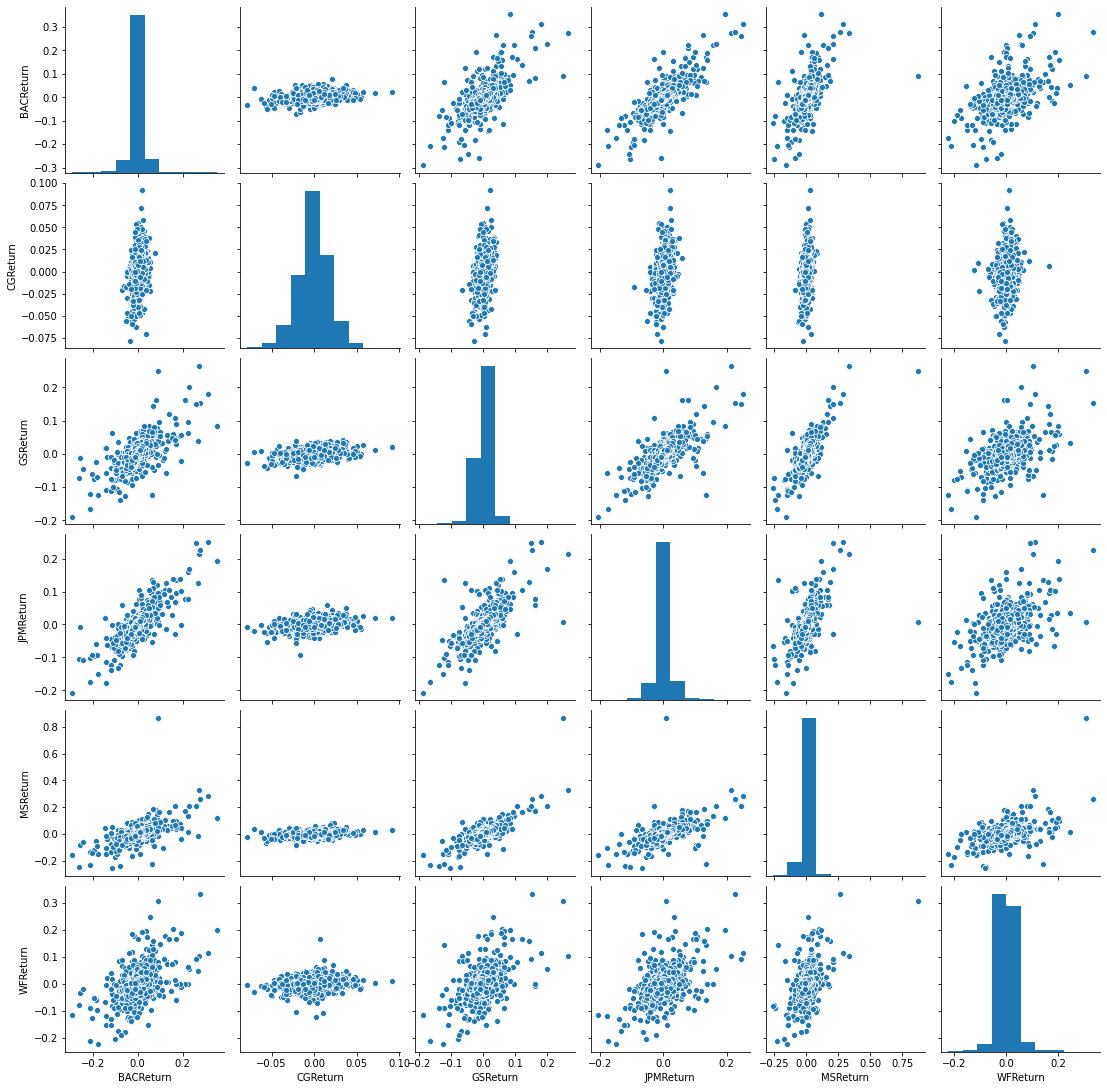

In [30]:
import seaborn as sns
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [32]:
returns.idxmin() #it was an inauguration

BACReturn   2009-01-20
CGReturn    2013-02-21
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFReturn    2008-09-29
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [33]:
returns.idxmax()

BACReturn   2009-04-09
CGReturn    2015-10-05
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFReturn    2009-03-10
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [35]:
returns.std() # std is used for calculating the standard deviation

BACReturn    0.036647
CGReturn     0.018727
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFReturn     0.035348
dtype: float64

In [43]:
returns.loc['2015-01-01':'2015-12-31'].std() 

BACReturn    0.016163
CGReturn     0.019148
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFReturn     0.022002
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MSReturn'>

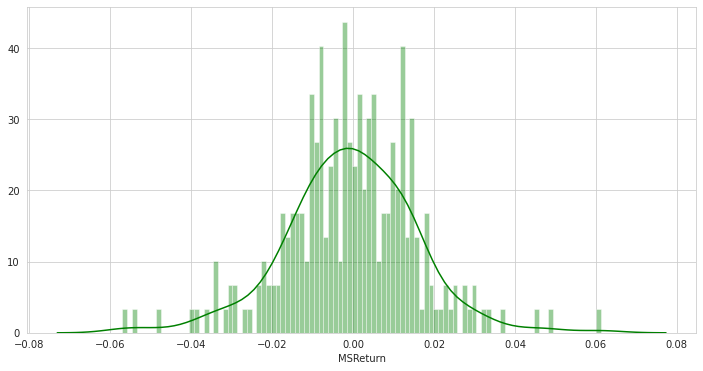

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']["MSReturn"],color="g",bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='CGReturn'>

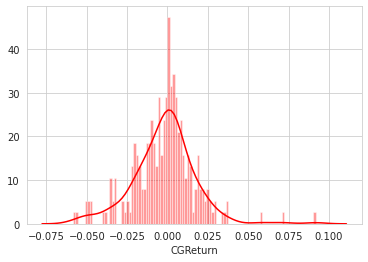

In [63]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['CGReturn'],color='red',bins=100)
#returns.loc['2015-01-01':'2015-12-31']['CGReturn']

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

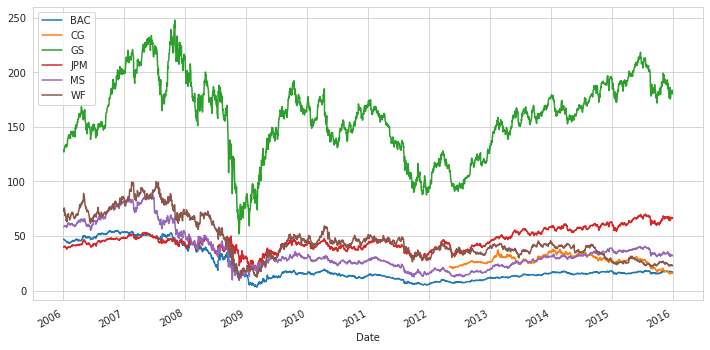

In [98]:
for x in tickers:
    bank_stocks[x]['Close'].plot(figsize=(12,6),label=x)
plt.legend()    

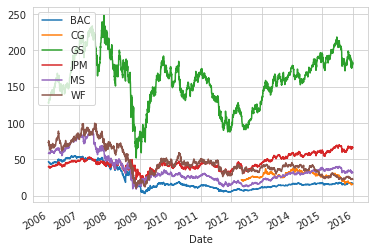

In [99]:
for x in tickers:
    bank_stocks.xs(key='Close',axis=1,level='Stock Info')[x].plot(label=x)
plt.legend()   

<AxesSubplot:xlabel='Date'>

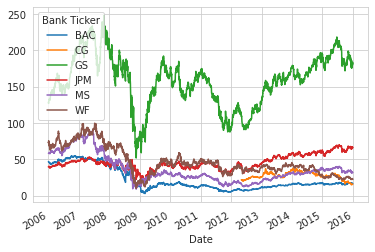

In [100]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

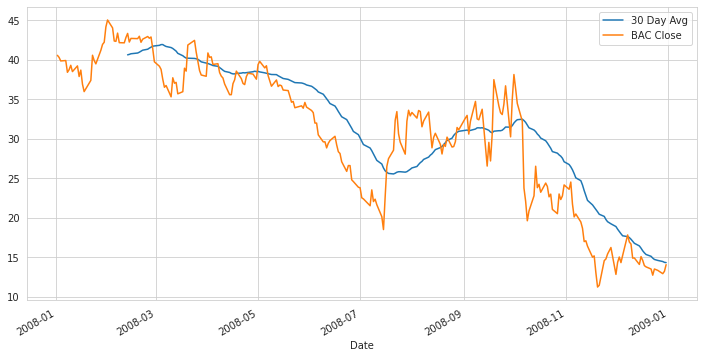

In [104]:
plt.figure(figsize=(12,6))
BAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label="30 Day Avg")  
BAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label="BAC Close")
plt.legend()
#rooling is used in plotting the data in the user defined window value. The window value refers number of observation used for calculation.

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

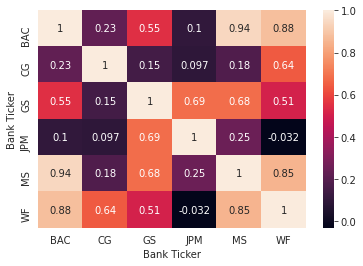

In [106]:
sns.heatmap(bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

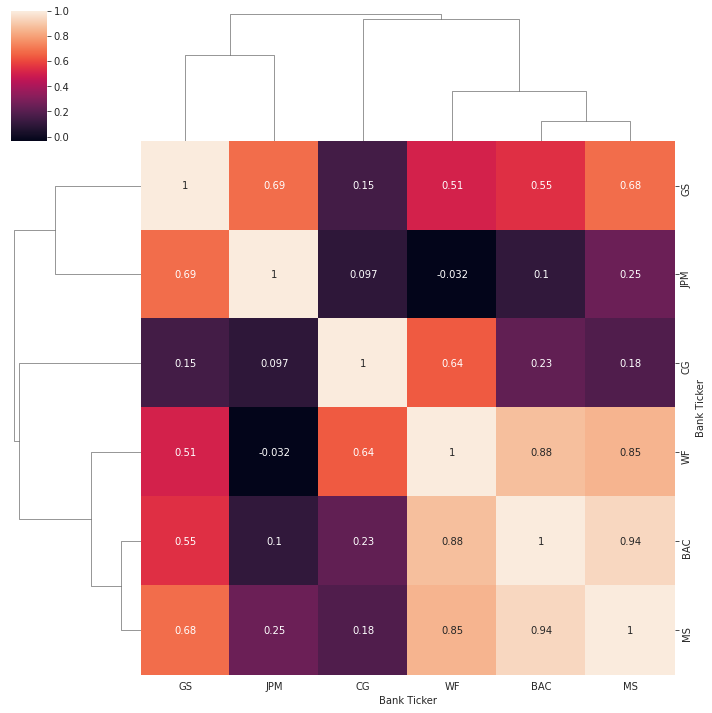

In [107]:
sns.clustermap(bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True)

In [79]:
#plotly
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [109]:
BAC.loc["2015-01-01":"2016-01-01"].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [113]:
MS["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study='sma')

In [115]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [112]:
BAC["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.